In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, kernel_initializer=tf.keras.initializers.HeUniform(),
                              kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.ReLU(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])


2021-09-28 23:30:19.776580: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 23:30:19.780768: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 23:30:19.781069: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 23:30:19.781856: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(x_train, y_train, validation_split=0.33, epochs=150, batch_size=1024) #, callbacks=[callback])

2021-09-28 23:30:20.456688: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
25/40 [=================>............] - ETA: 0s - loss: 24.0506 - accuracy: 0.7996 

2021-09-28 23:30:21.151276: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


40/40 [==============================] - 1s 6ms/step - loss: 17.8497 - accuracy: 0.8189 - val_loss: 7.2869 - val_accuracy: 0.3331
Epoch 2/150
40/40 [==============================] - 0s 3ms/step - loss: 4.8487 - accuracy: 0.8654 - val_loss: 5.8681 - val_accuracy: 0.3383
Epoch 3/150
40/40 [==============================] - 0s 3ms/step - loss: 4.2619 - accuracy: 0.8775 - val_loss: 5.5224 - val_accuracy: 0.2888
Epoch 4/150
40/40 [==============================] - 0s 3ms/step - loss: 4.0339 - accuracy: 0.8848 - val_loss: 5.2019 - val_accuracy: 0.4530
Epoch 5/150
40/40 [==============================] - 0s 3ms/step - loss: 3.8652 - accuracy: 0.8893 - val_loss: 4.7544 - val_accuracy: 0.5557
Epoch 6/150
40/40 [==============================] - 0s 3ms/step - loss: 3.7059 - accuracy: 0.8930 - val_loss: 4.4313 - val_accuracy: 0.6935
Epoch 7/150
40/40 [==============================] - 0s 3ms/step - loss: 3.6490 - accuracy: 0.8953 - val_loss: 4.2950 - val_accuracy: 0.7335
Epoch 8/150
40/40 [=====

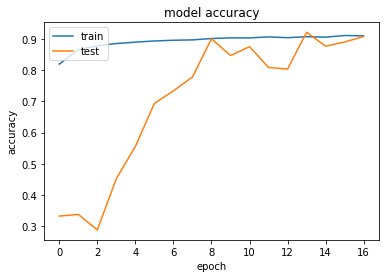

In [7]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


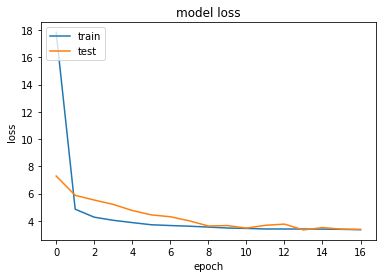

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 3.3684 - accuracy: 0.9048


[3.3684301376342773, 0.9047999978065491]